# An Analysis of COVID-19 Case Trends in Ontario

In [1]:
import os
import pandas as pd 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
covid_df= pd.read_csv('Resources/conposcovidloc.csv')
covid_df.head()

,Row_ID,Accurate_Episode_Date,Case_Reported_Date,Test_Reported_Date,Specimen_Date,Age_Group,Client_Gender,Case_AcquisitionInfo,Outcome1,Outbreak_Related,Reporting_PHU_ID,Reporting_PHU,Reporting_PHU_Address,Reporting_PHU_City,Reporting_PHU_Postal_Code,Reporting_PHU_Website,Reporting_PHU_Latitude,Reporting_PHU_Longitude
0,1,2020-06-11,2020-06-14,2020-06-14,2020-06-13,20s,MALE,NO KNOWN EPI LINK,Resolved,NaN,2253,Peel Public Health,7120 Hurontario Street,Mississauga,L5W 1N4,www.peelregion.ca/health/,43.647471,-79.708893
1,2,2020-04-11,2020-04-19,2020-04-19,2020-04-13,30s,FEMALE,OB,Resolved,Yes,2253,Peel Public Health,7120 Hurontario Street,Mississauga,L5W 1N4,www.peelregion.ca/health/,43.647471,-79.708893
2,3,2020-07-08,2020-07-10,2020-07-10,2020-07-09,30s,MALE,OB,Resolved,Yes,2253,Peel Public Health,7120 Hurontario Street,Mississauga,L5W 1N4,www.peelregion.ca/health/,43.647471,-79.708893
3,4,2020-05-26,2020-06-01,2020-05-31,2020-05-29,20s,FEMALE,NO KNOWN EPI LINK,Resolved,NaN,2236,Halton Region Health Department,1151 Bronte Road,Oakville,L6M 3Ll,www.halton.ca/For-Residents/Public-Health/,43.413997,-79.744796
4,5,2020-04-27,2020-05-05,2020-05-05,2020-05-04,20s,FEMALE,OB,Resolved,Yes,2253,Peel Public Health,7120 Hurontario Street,Mississauga,L5W 1N4,www.peelregion.ca/health/,43.647471,-79.708893


In [3]:
covid_df.rename(columns={'Reporting_PHU': 'Health Units','Outcome1': 'Outcome' })

,Row_ID,Accurate_Episode_Date,Case_Reported_Date,Test_Reported_Date,Specimen_Date,Age_Group,Client_Gender,Case_AcquisitionInfo,Outcome,Outbreak_Related,Reporting_PHU_ID,Health Units,Reporting_PHU_Address,Reporting_PHU_City,Reporting_PHU_Postal_Code,Reporting_PHU_Website,Reporting_PHU_Latitude,Reporting_PHU_Longitude
0,1,2020-06-11,2020-06-14,2020-06-14,2020-06-13,20s,MALE,NO KNOWN EPI LINK,Resolved,NaN,2253,Peel Public Health,7120 Hurontario Street,Mississauga,L5W 1N4,www.peelregion.ca/health/,43.647471,-79.708893
1,2,2020-04-11,2020-04-19,2020-04-19,2020-04-13,30s,FEMALE,OB,Resolved,Yes,2253,Peel Public Health,7120 Hurontario Street,Mississauga,L5W 1N4,www.peelregion.ca/health/,43.647471,-79.708893
2,3,2020-07-08,2020-07-10,2020-07-10,2020-07-09,30s,MALE,OB,Resolved,Yes,2253,Peel Public Health,7120 Hurontario Street,Mississauga,L5W 1N4,www.peelregion.ca/health/,43.647471,-79.708893
3,4,2020-05-26,2020-06-01,2020-05-31,2020-05-29,20s,FEMALE,NO KNOWN EPI LINK,Resolved,NaN,2236,Halton Region Health Department,1151 Bronte Road,Oakville,L6M 3Ll,www.halton.ca/For-Residents/Public-Health/,43.413997,-79.744796
4,5,2020-04-27,2020-05-05,2020-05-05,2020-05-04,20s,FEMALE,OB,Resolved,Yes,2253,Peel Public Health,7120 Hurontario Street,Mississauga,L5W 1N4,www.peelregion.ca/health/,43.647471,-79.708893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541875,541876,2021-04-27,2021-04-30,2021-05-02,2021-04-27,60s,MALE,TRAVEL,Resolved,NaN,2236,Halton Region Health Department,1151 Bronte Road,Oakville,L6M 3Ll,www.halton.ca/For-Residents/Public-Health/,43.413997,-79.744796
541876,541877,2021-04-01,2021-04-07,2021-04-07,2021-04-06,50s,MALE,CC,Resolved,NaN,3895,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358
541877,541878,2021-01-02,2021-01-06,2021-01-06,2021-01-05,30s,FEMALE,CC,Resolved,NaN,2270,York Region Public Health Services,17250 Yonge Street,Newmarket,L3Y 6Z1,www.york.ca/wps/portal/yorkhome/health/,44.048023,-79.480239
541878,541879,2021-04-06,2021-04-08,2021-04-08,2021-04-07,<20,FEMALE,CC,Resolved,NaN,2270,York Region Public Health Services,17250 Yonge Street,Newmarket,L3Y 6Z1,www.york.ca/wps/portal/yorkhome/health/,44.048023,-79.480239


In [4]:
covid_df.count()

Row_ID                       541880
Accurate_Episode_Date        541880
Case_Reported_Date           541880
Test_Reported_Date           529423
Specimen_Date                539613
Age_Group                    541880
Client_Gender                541880
Case_AcquisitionInfo         541880
Outcome1                     541880
Outbreak_Related              91962
Reporting_PHU_ID             541880
Reporting_PHU                541880
Reporting_PHU_Address        541880
Reporting_PHU_City           541880
Reporting_PHU_Postal_Code    541880
Reporting_PHU_Website        541880
Reporting_PHU_Latitude       541880
Reporting_PHU_Longitude      541880
dtype: int64

In [5]:
covid_df = covid_df.drop(["Reporting_PHU_Website"], axis=1)
covid_df.head()

,Row_ID,Accurate_Episode_Date,Case_Reported_Date,Test_Reported_Date,Specimen_Date,Age_Group,Client_Gender,Case_AcquisitionInfo,Outcome1,Outbreak_Related,Reporting_PHU_ID,Reporting_PHU,Reporting_PHU_Address,Reporting_PHU_City,Reporting_PHU_Postal_Code,Reporting_PHU_Latitude,Reporting_PHU_Longitude
0,1,2020-06-11,2020-06-14,2020-06-14,2020-06-13,20s,MALE,NO KNOWN EPI LINK,Resolved,NaN,2253,Peel Public Health,7120 Hurontario Street,Mississauga,L5W 1N4,43.647471,-79.708893
1,2,2020-04-11,2020-04-19,2020-04-19,2020-04-13,30s,FEMALE,OB,Resolved,Yes,2253,Peel Public Health,7120 Hurontario Street,Mississauga,L5W 1N4,43.647471,-79.708893
2,3,2020-07-08,2020-07-10,2020-07-10,2020-07-09,30s,MALE,OB,Resolved,Yes,2253,Peel Public Health,7120 Hurontario Street,Mississauga,L5W 1N4,43.647471,-79.708893
3,4,2020-05-26,2020-06-01,2020-05-31,2020-05-29,20s,FEMALE,NO KNOWN EPI LINK,Resolved,NaN,2236,Halton Region Health Department,1151 Bronte Road,Oakville,L6M 3Ll,43.413997,-79.744796
4,5,2020-04-27,2020-05-05,2020-05-05,2020-05-04,20s,FEMALE,OB,Resolved,Yes,2253,Peel Public Health,7120 Hurontario Street,Mississauga,L5W 1N4,43.647471,-79.708893


# Counts and rates of recent COVID-19 cases by gender in Ontario

In [6]:
#Which gender is most likely to get COVID?
gender_count= covid_df['Client_Gender'].value_counts()

gender_count

MALE              269927
FEMALE            268096
UNSPECIFIED         3824
GENDER DIVERSE        33
Name: Client_Gender, dtype: int64

In [7]:
#percentage of positive cases by gender 
((covid_df['Client_Gender'].value_counts()/covid_df['Client_Gender'].count())*100).round(2)

MALE              49.81
FEMALE            49.48
UNSPECIFIED        0.71
GENDER DIVERSE     0.01
Name: Client_Gender, dtype: float64

In [8]:
#replace UNSPECIFIED and GENDER DIVERSE by others 
covid_df['Client_Gender'] = covid_df['Client_Gender'].replace(
    {'UNSPECIFIED': 'other', 'GENDER DIVERSE': 'other'})

In [9]:
covid_df['Client_Gender'].unique()

array(['MALE', 'FEMALE', 'other'], dtype=object)

In [10]:
gender_count= covid_df['Client_Gender'].value_counts()
gender_count

MALE      269927
FEMALE    268096
other       3857
Name: Client_Gender, dtype: int64

<AxesSubplot:title={'center':'Comparaison of covid19 cases by gender '}, ylabel='Client_Gender'>

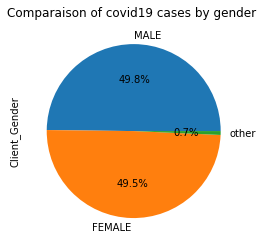

In [11]:
# create a pie chart to compare the covid19 rate in each gender 
pie_plot= gender_count.plot(kind='pie',title= 'Comparaison of covid19 cases by gender ', autopct= '%1.1f%%' )
pie_plot

The number of male snd female are pretty close to 50/50. There were also 0.75% of other cases 

# Geographic Location

In [12]:
covid_df['Reporting_PHU_City'].unique()

array(['Mississauga', 'Oakville', 'Owen Sound', 'Kingston', 'Guelph',
       'Toronto', 'Newmarket', 'Waterloo', 'Windsor', 'Thorold', 'Barrie',
       'Hamilton', 'Chatham', 'St. Thomas', 'Sudbury', 'Brantford',
       'Peterborough', 'New Liskeard', 'Sault Ste. Marie', 'Cornwall',
       'London', 'Whitby', 'Point Edward', 'Ottawa', 'Stratford',
       'Belleville', 'Timmins', 'Simcoe', 'Thunder Bay', 'Port Hope',
       'North Bay', 'Pembroke', 'Kenora', 'Brockville'], dtype=object)

In [13]:
#Number of positive cases in each city
cities_df= covid_df['Reporting_PHU_City'].value_counts()
cities_df

Toronto             164341
Mississauga         109148
Newmarket            52461
Ottawa               27522
Whitby               25114
Hamilton             21099
Oakville             17291
Waterloo             16944
Windsor              16780
Thorold              16111
London               12504
Barrie               12318
Guelph                8113
Cornwall              4627
St. Thomas            3853
Brantford             3837
Point Edward          3552
Thunder Bay           3329
Simcoe                2665
Port Hope             2145
Sudbury               2112
Timmins               1951
Stratford             1908
Chatham               1874
Brockville            1746
Peterborough          1564
Kingston              1536
Owen Sound            1364
Belleville            1128
Kenora                1078
Pembroke               738
North Bay              521
Sault Ste. Marie       399
New Liskeard           207
Name: Reporting_PHU_City, dtype: int64

In [14]:
cities_df.describe()

count        34.000000
mean      15937.647059
std       33251.354969
min         207.000000
25%        1609.500000
50%        3440.500000
75%       16612.750000
max      164341.000000
Name: Reporting_PHU_City, dtype: float64

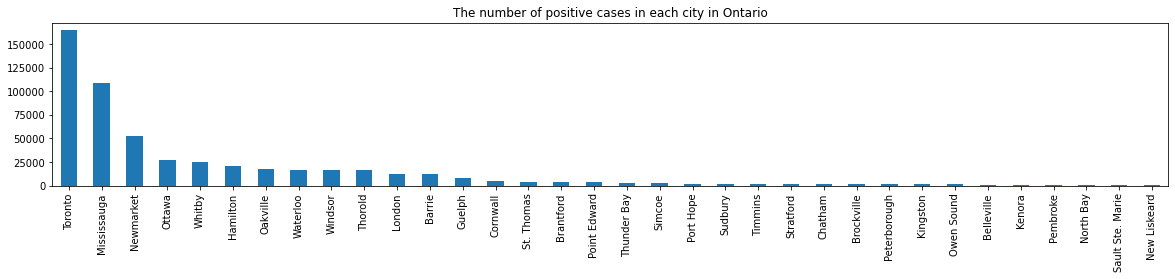

<Figure size 432x288 with 0 Axes>

In [15]:
cities_df.plot(kind= 'bar', figsize=(20,3))
plt.title('The number of positive cases in each city in Ontario')
plt.show()
plt.tight_layout()

Toronto makes up the largest number of positive cases at over a quarter (164341 cases) after that the largest number of confirmed casesis is in Mississauga with 109148 of cases 

# Case Outcome

In [16]:
covid_survived= covid_df.groupby('Outcome1').Outcome1.count()
covid_survived

Outcome1
Fatal             9007
Not Resolved      3871
Resolved        529002
Name: Outcome1, dtype: int64

<AxesSubplot:title={'center':'covid19 outcome '}>

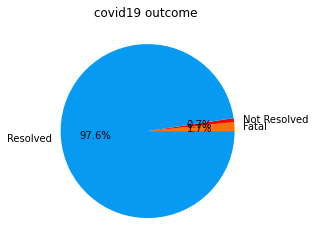

In [48]:
#create a pie chart to illustrate the covid 19 outcome in Ontario 
colours = ['#F97306', 'red', '#069AF3',]
covid_outcome= covid_survived.plot(kind='pie',title= 'covid19 outcome ', colors= colours, autopct= '%1.1f%%', ylabel='')

covid_outcome

In [18]:
covid_df[['Reporting_PHU_City','Outcome1']]


,Reporting_PHU_City,Outcome1
0,Mississauga,Resolved
1,Mississauga,Resolved
2,Mississauga,Resolved
3,Oakville,Resolved
4,Mississauga,Resolved
...,...,...
541875,Oakville,Resolved
541876,Toronto,Resolved
541877,Newmarket,Resolved
541878,Newmarket,Resolved


In [19]:
#total case outcomes (resolutions and deaths) by city 
city_outcome= covid_df.groupby(['Reporting_PHU_City', 'Outcome1']).Outcome1.count()
city_outcome.head(20)

Reporting_PHU_City  Outcome1    
Barrie              Fatal             247
                    Not Resolved      107
                    Resolved        11964
Belleville          Fatal              11
                    Not Resolved        4
                    Resolved         1113
Brantford           Fatal              23
                    Not Resolved       51
                    Resolved         3763
Brockville          Fatal              60
                    Not Resolved       10
                    Resolved         1676
Chatham             Fatal              23
                    Not Resolved        4
                    Resolved         1847
Cornwall            Fatal             118
                    Not Resolved       15
                    Resolved         4494
Guelph              Fatal             122
                    Not Resolved       58
Name: Outcome1, dtype: int64

In [20]:
death_city= covid_df.loc[covid_df['Outcome1']== 'Fatal', :]
death_city                           

,Row_ID,Accurate_Episode_Date,Case_Reported_Date,Test_Reported_Date,Specimen_Date,Age_Group,Client_Gender,Case_AcquisitionInfo,Outcome1,Outbreak_Related,Reporting_PHU_ID,Reporting_PHU,Reporting_PHU_Address,Reporting_PHU_City,Reporting_PHU_Postal_Code,Reporting_PHU_Latitude,Reporting_PHU_Longitude
5,6,2020-04-17,2020-05-01,2020-05-01,2020-04-28,70s,MALE,OB,Fatal,Yes,2253,Peel Public Health,7120 Hurontario Street,Mississauga,L5W 1N4,43.647471,-79.708893
6,7,2020-05-25,2020-06-01,2020-06-01,2020-05-30,60s,FEMALE,CC,Fatal,NaN,2253,Peel Public Health,7120 Hurontario Street,Mississauga,L5W 1N4,43.647471,-79.708893
40,41,2020-03-29,2020-04-18,2020-04-18,2020-04-16,70s,FEMALE,OB,Fatal,Yes,2253,Peel Public Health,7120 Hurontario Street,Mississauga,L5W 1N4,43.647471,-79.708893
69,70,2020-05-05,2020-05-06,2020-05-05,2020-05-05,70s,FEMALE,OB,Fatal,Yes,2253,Peel Public Health,7120 Hurontario Street,Mississauga,L5W 1N4,43.647471,-79.708893
83,84,2020-04-05,2020-04-09,2020-04-09,2020-04-08,90+,FEMALE,OB,Fatal,Yes,2253,Peel Public Health,7120 Hurontario Street,Mississauga,L5W 1N4,43.647471,-79.708893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541424,541425,2020-04-10,2020-04-15,2020-04-15,2020-04-13,80s,MALE,OB,Fatal,Yes,2253,Peel Public Health,7120 Hurontario Street,Mississauga,L5W 1N4,43.647471,-79.708893
541515,541516,2021-03-02,2021-04-03,2021-04-03,2021-04-02,50s,MALE,CC,Fatal,NaN,2270,York Region Public Health Services,17250 Yonge Street,Newmarket,L3Y 6Z1,44.048023,-79.480239
541567,541568,2021-01-17,2021-01-18,2021-01-18,2021-01-17,80s,FEMALE,OB,Fatal,Yes,3895,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,43.656591,-79.379358
541789,541790,2020-04-03,2020-04-06,2020-04-06,2020-04-03,80s,FEMALE,OB,Fatal,Yes,2246,Niagara Region Public Health Department,1815 Sir Isaac Brock Way,Thorold,L2V 4T7,43.116537,-79.241220


In [21]:
#The count of people died from covid19 in each city 
death_city_df=death_city.groupby(['Reporting_PHU_City', 'Outcome1']).Outcome1.count()
df= pd.DataFrame(death_city_df)
df

,,Outcome1
Reporting_PHU_City,Outcome1,
Barrie,Fatal,247
Belleville,Fatal,11
Brantford,Fatal,23
Brockville,Fatal,60
Chatham,Fatal,23
Cornwall,Fatal,118
Guelph,Fatal,122
Hamilton,Fatal,397
Kenora,Fatal,6


In [22]:
#rename columnn 
df_rename= df.rename(columns={'Outcome1': 'Deaths'})
df_rename

,,Deaths
Reporting_PHU_City,Outcome1,
Barrie,Fatal,247
Belleville,Fatal,11
Brantford,Fatal,23
Brockville,Fatal,60
Chatham,Fatal,23
Cornwall,Fatal,118
Guelph,Fatal,122
Hamilton,Fatal,397
Kenora,Fatal,6


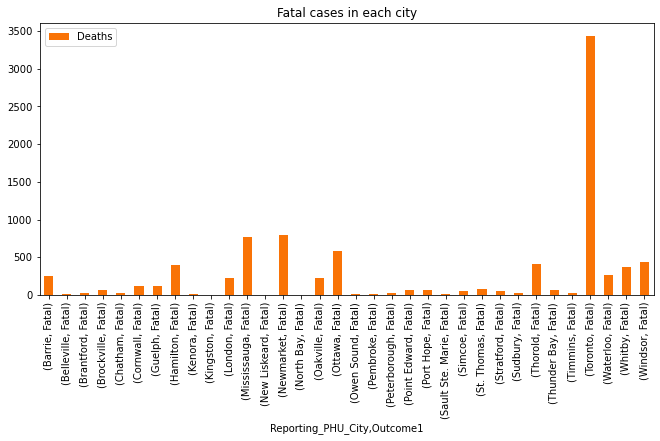

<Figure size 432x288 with 0 Axes>

In [46]:
#bar chart to plot the number of deaths in each city 
colours = ['#F97306', '#069AF3']
df_rename.plot(kind= 'bar', color= colours, figsize=(11,5))
plt.title('Fatal cases in each city')
plt.show()
plt.tight_layout()

In [24]:
#Outcome of cases in differente heaths units 
unit_df= covid_df.groupby(['Reporting_PHU', 'Outcome1']).Outcome1.count()
unit_df.head()

Reporting_PHU              Outcome1    
Algoma Public Health Unit  Fatal             6
                           Not Resolved      3
                           Resolved        390
Brant County Health Unit   Fatal            23
                           Not Resolved     51
Name: Outcome1, dtype: int64

In [25]:
outcome_df= pd.DataFrame(unit_df)
outcome_df

Outcome1
Reporting_PHU                      Outcome1              
Algoma Public Health Unit          Fatal                6
                                   Not Resolved         3
                                   Resolved           390
Brant County Health Unit           Fatal               23
                                   Not Resolved        51
...                                                   ...
Windsor-Essex County Health Unit   Not Resolved        58
                                   Resolved         16286
York Region Public Health Services Fatal              789
                                   Not Resolved       169
                                   Resolved         51503

[102 rows x 1 columns]